# MAV Data

- [Dataset Vicon room 1 “easy”](https://projects.asl.ethz.ch/datasets/doku.php?id=kmavvisualinertialdatasets)

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from collections import namedtuple

In [3]:
from utils import EKF

In [16]:
import csv
from slurm import storage
from pprint import pprint
from pathlib import Path

In [5]:
from ipywidgets import Video
Video.from_file("test.mp4")

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00~\\\x9emdat\x00\x00…

In [8]:
!ls ~/tmp/mav/mav0

body.yaml                   pointcloud0
cam0                        state_groundtruth_estimate0
cam1                        vicon0
imu0


In [21]:
!ls ~/tmp/mav/mav0/imu0

data.csv    sensor.yaml


In [31]:
mav_path = Path.home() / ("tmp/mav/mav0")

In [32]:
imu_model = storage.read(str(mav_path / "imu0/sensor.yaml"))
pprint(imu_model)

{'T_BS': {'cols': 4,
          'data': [1.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   1.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   1.0,
                   0.0,
                   0.0,
                   0.0,
                   0.0,
                   1.0],
          'rows': 4},
 'accelerometer_noise_density': 0.002,
 'accelerometer_random_walk': 0.003,
 'comment': 'VI-Sensor IMU (ADIS16448)',
 'gyroscope_noise_density': 0.00016968,
 'gyroscope_random_walk': 1.9393e-05,
 'rate_hz': 200,
 'sensor_type': 'imu'}


In [33]:
accel = []
gyro = []
ts_start = None
with open(mav_path / "imu0/data.csv", newline='') as csvfile:
    rd = csv.reader(csvfile, delimiter=',')
    for row in rd:
        line = []
        try:
            ts = float(row[0])
            if ts_start is None:
                ts_start = ts
            a = [ts - ts_start]
            for v in row[4:]:
                a.append(float(v))
            accel.append(a)
            g = [ts-ts_start]
            for v in row[1:4]:
                g.append(float(v))
            gyro.append(g)
        except Exception as e:
            # print(e)
            print(row)
            continue
print(f">> Length imu_data: {len(accel)}")

['#timestamp [ns]', 'w_RS_S_x [rad s^-1]', 'w_RS_S_y [rad s^-1]', 'w_RS_S_z [rad s^-1]', 'a_RS_S_x [m s^-2]', 'a_RS_S_y [m s^-2]', 'a_RS_S_z [m s^-2]']
>> Length imu_data: 29120


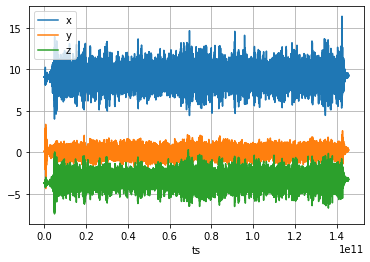

In [35]:
adf = pd.DataFrame(accel, columns=["ts","x","y","z"])
adf.plot(x="ts", grid=True);
# adf.info()

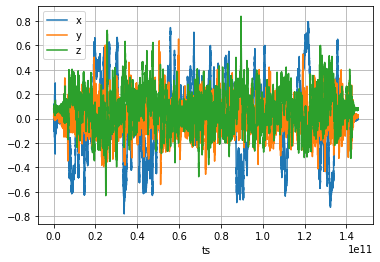

In [36]:
gdf = pd.DataFrame(gyro, columns=["ts","x","y","z"])
gdf.plot(x="ts", grid=True);

In [15]:
ekf = EKF(1/200)

In [37]:
!ls

__pycache__    mov.py         sim.py         utils.py
mav-v1.ipynb   sim.pickle.bag test.mp4       vo.py


In [40]:
list(Path(".").glob("*.py"))

[PosixPath('sim.py'),
 PosixPath('vo.py'),
 PosixPath('utils.py'),
 PosixPath('mov.py')]

In [45]:
list(Path.home().joinpath("github").glob("*.sh"))

[PosixPath('/Users/kevin/github/pull-all.sh'),
 PosixPath('/Users/kevin/github/git-pull.sh')]

In [46]:
Path.home() / "tmp"

PosixPath('/Users/kevin/tmp')

In [47]:
Path(".").glob("*.py")

<generator object Path.glob at 0x11b40ce40>